In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [5]:
def snake_case(df):
    df.columns=[e.lower().replace(' ', '_') for e in df.columns]
    return

In [6]:
snake_case(data)

In [7]:
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [8]:
data['effective_to_date']= pd.to_datetime(data['effective_to_date'])

In [9]:
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [10]:
numericals = data.select_dtypes(np.number)

In [11]:
numericals

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [12]:
def select_discrete(numericals):
    selected = numericals.select_dtypes(include='int')
    return selected

In [13]:
discrete = select_discrete(numericals)



In [14]:
discrete

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,56274,69,32,5,0,1
1,0,94,13,42,0,8
2,48767,108,18,38,0,2
3,0,106,18,65,0,7
4,43836,73,12,44,0,1
...,...,...,...,...,...,...
9129,71941,73,18,89,0,2
9130,21604,79,14,28,0,1
9131,0,85,9,37,3,2
9132,21941,96,34,3,0,3


In [15]:
def select_continuous(numericals):
    selected2 = numericals.select_dtypes(include='float')
    return selected2

In [16]:
continuous = select_continuous(numericals)

In [17]:
continuous

,customer_lifetime_value,total_claim_amount
0,2763.519279,384.811147
1,6979.535903,1131.464935
2,12887.431650,566.472247
3,7645.861827,529.881344
4,2813.692575,138.130879
...,...,...
9129,23405.987980,198.234764
9130,3096.511217,379.200000
9131,8163.890428,790.784983
9132,7524.442436,691.200000


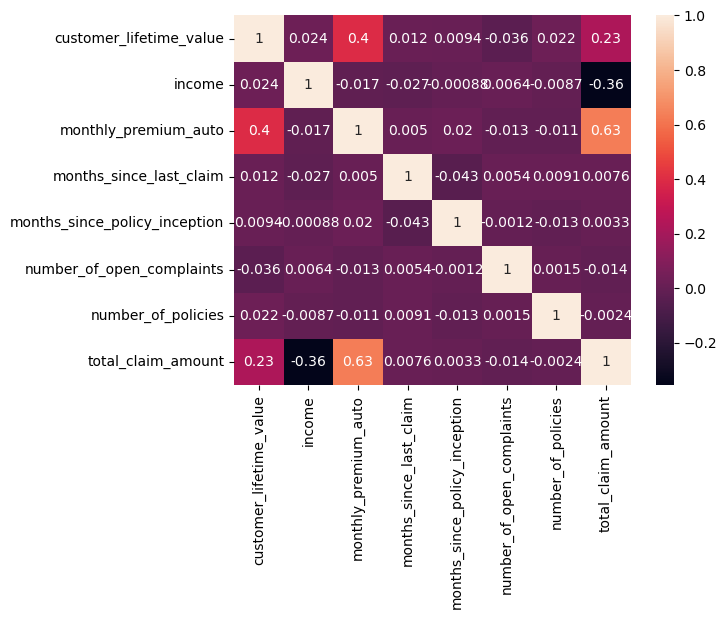

In [18]:
correlations_numerical = numericals.corr()
sns.heatmap(correlations_numerical, annot=True)
plt.show()

In [19]:
###we see very low correlations between the numerical variables in general 
###we do want to see low correlations between the "explainer" variables 
###low/close to 0 correlations means more reliable results 

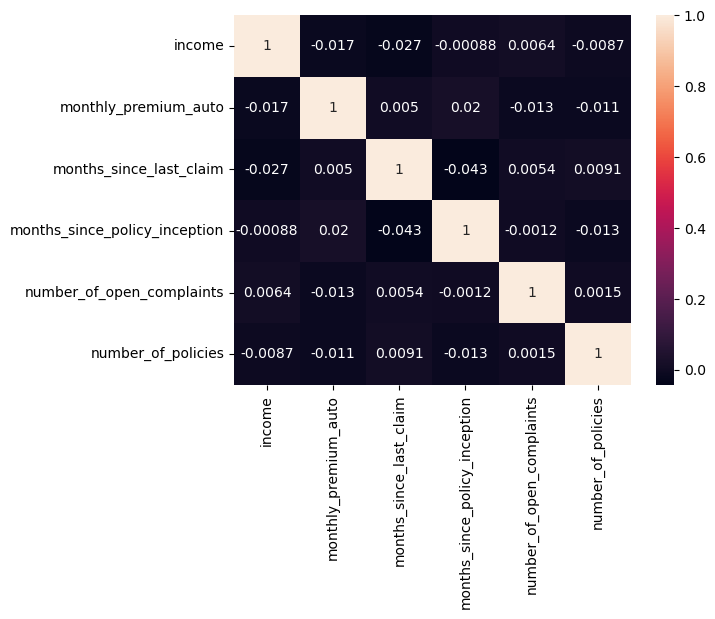

In [20]:
correlations_discrete = discrete.corr()
sns.heatmap(correlations_discrete, annot=True)
plt.show()

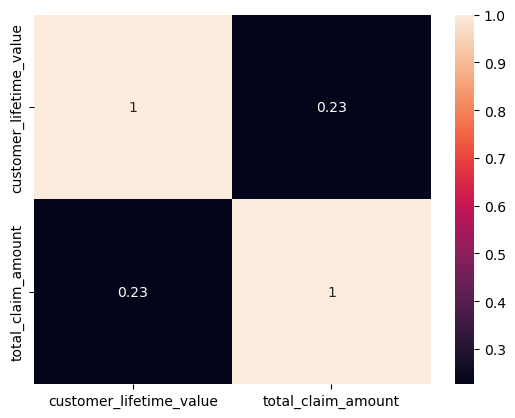

In [21]:
correlations_continuous = continuous.corr()
sns.heatmap(correlations_continuous, annot=True)
plt.show()

In [22]:
def histograms_discrete(discrete):
    for column in discrete.columns:
        plt.hist(discrete[column],bins=20) 
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {column}')
        plt.show()

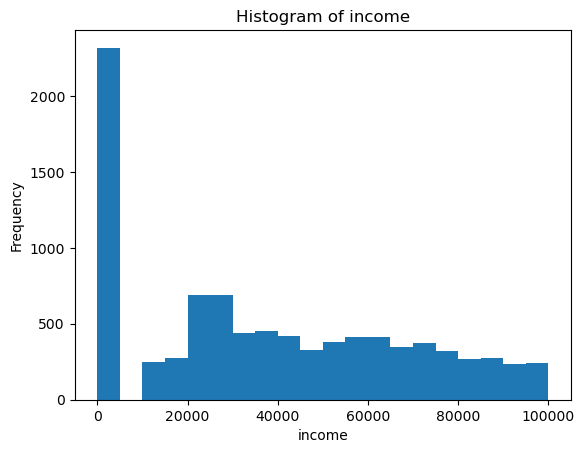

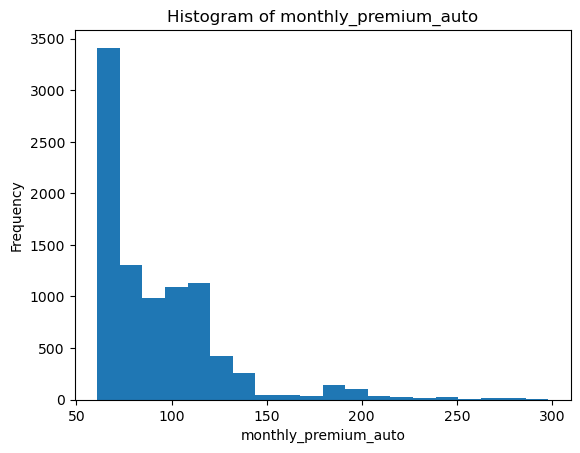

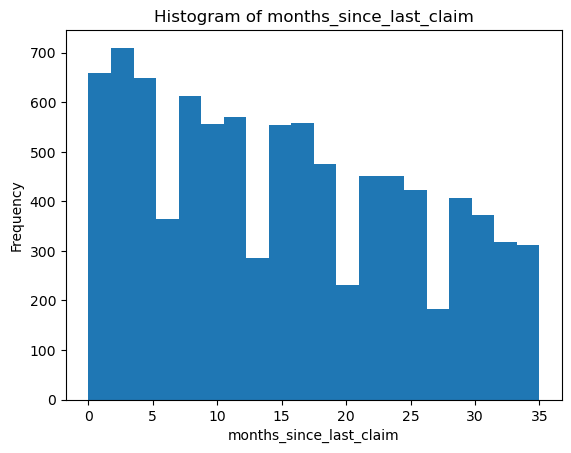

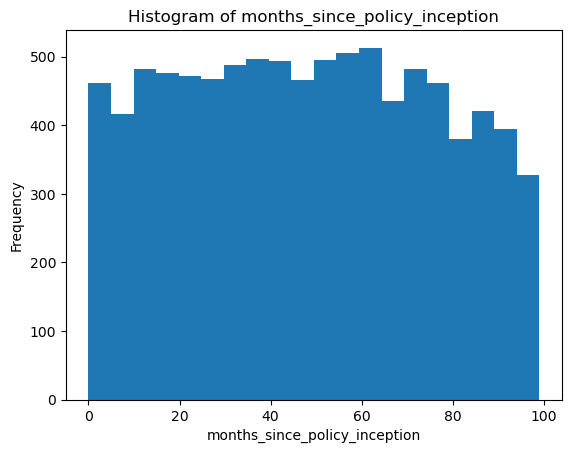

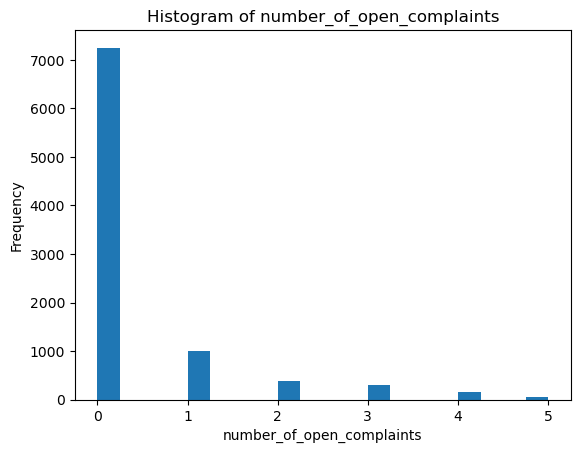

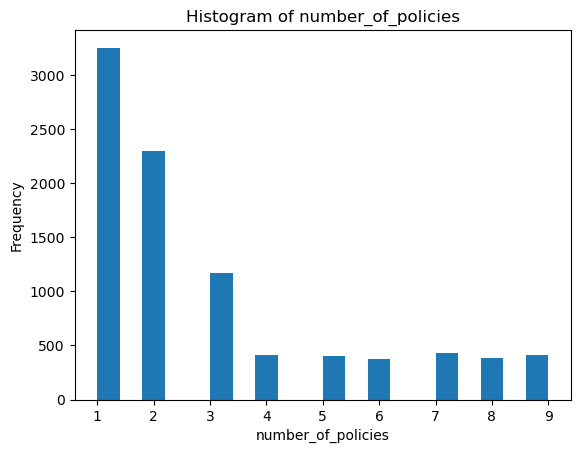

In [23]:
histograms_discrete(discrete) ##there seems to be alot of 0's in income 


In [24]:
discrete['income'].value_counts(dropna=False)

0        2317
95697      12
27972       7
25370       7
61108       7
         ... 
36529       1
25859       1
38179       1
70190       1
21941       1
Name: income, Length: 5694, dtype: int64

In [25]:
#def barplots_disc(discrete):
    #for column in discrete.columns:
        #counts = discrete[column].value_counts()
        #plt.bar(counts.index, counts.values)
        #plt.xlabel(column)
        #plt.ylabel('Frequency')
        #plt.title(f'Bar Plot of {column}')
        #plt.show()

In [26]:
def histograms_cont(continuous):
    for column in continuous.columns:
        plt.hist(continuous[column],bins=100) 
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {column}')
        plt.show()

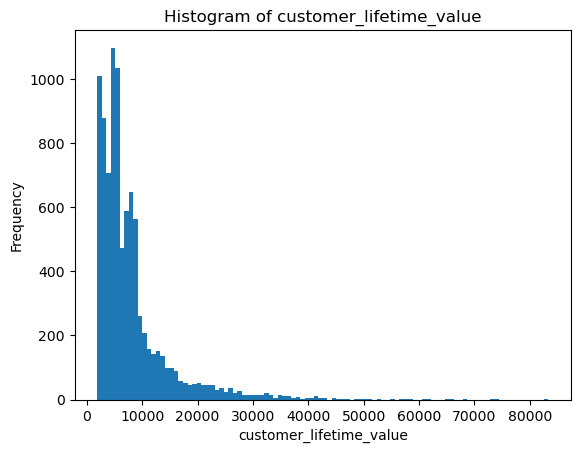

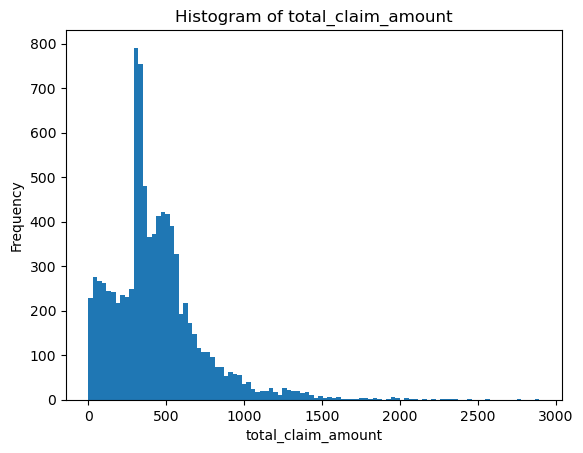

In [27]:
histograms_cont(continuous)

In [28]:
##histograms_dis(discrete)

In [29]:
def boxplots_cont(continuous):
    for column in continuous.columns:
        plt.boxplot(continuous[column])
        plt.xlabel(column)
        plt.ylabel('Value')
        plt.title(f'Box Plot of {column}')
        plt.show()

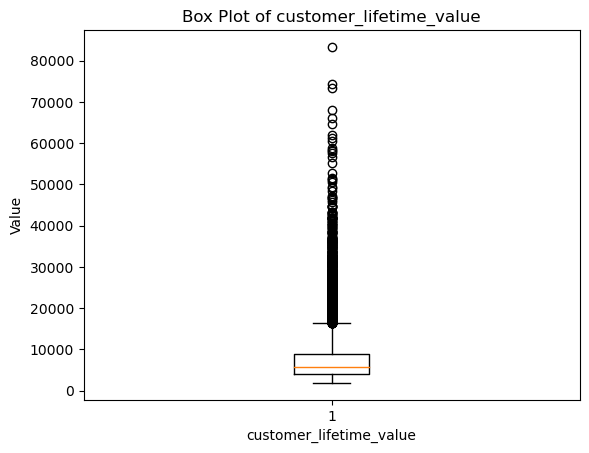

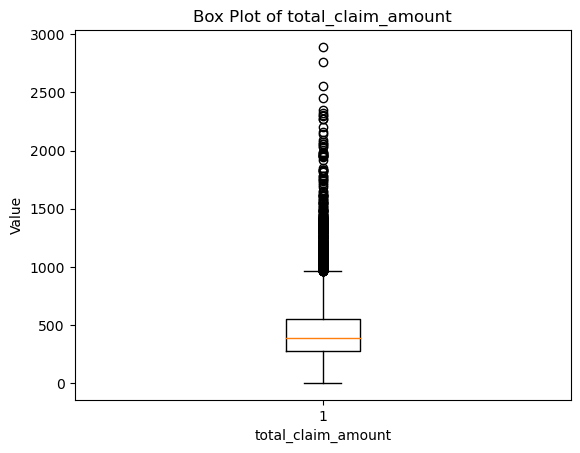

In [30]:
 boxplots_cont(continuous) ##we see only 3 points spread out at the top (for clv for example), and these are not too far out of the range,
                            ##this would indicate that we can treat these variables as they are without the outliers having a large effect
                            ###this is the same for our target variable

In [31]:
continuous.isnull().sum()

customer_lifetime_value    0
total_claim_amount         0
dtype: int64

In [32]:
data.isnull().sum() ##we dont have null values

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [33]:
#clv_labels = [1,2,3,4,5,6,7]
#continuous['customer_lifetime_value']= pd.qcut(continuous['customer_lifetime_value'],7,labels=clv_labels)
#continuous ##binned the customer_lifetime_value

In [34]:
#clv_labels2 = [1,2,3,4,5,6,7]
#data['customer_lifetime_value']= pd.qcut(data['customer_lifetime_value'],7,labels=clv_labels2)
#data ##binned the customer_lifetime_value also in original data

In [35]:
#data

In [36]:
#continuous['customer_lifetime_value'].value_counts()

In [37]:
#data

In [38]:
#continuous['total_claim_amount'].value_counts()

In [39]:
log_cont = np.log(continuous)
log_cont ##we could use a log, but it shouldent be necessary

,customer_lifetime_value,total_claim_amount
0,7.924260,5.952753
1,8.850738,7.031268
2,9.464008,6.339428
3,8.941920,6.272653
4,7.942253,4.928202
...,...,...
9129,10.060747,5.289452
9130,8.038031,5.938064
9131,9.007476,6.673026
9132,8.925912,6.538429


In [40]:
log_cont = np.log(data['customer_lifetime_value'])

In [41]:
data.to_csv('datafromlab1.csv', index=False) 

# Lab 4.02

In [42]:
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [43]:
categoricals = data.select_dtypes(object)
categoricals

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [44]:
data.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [45]:
categoricals.isnull().sum() ##no nulls here either

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [46]:
data['state'].value_counts() ##not too many states in the list

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

In [47]:
data['response'].value_counts() ##only yes's and no's

No     7826
Yes    1308
Name: response, dtype: int64

In [48]:
data['coverage'].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

In [49]:
data['gender'].value_counts()

F    4658
M    4476
Name: gender, dtype: int64

In [50]:
data['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [51]:
data['policy_type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [52]:
data = data.drop('customer',axis = 1) ##dropped ID because we wont need it for the analysis

In [53]:
data = data.drop('policy_type',axis = 1) ##dropped policy type because it is redundant in the policy column

In [54]:
data

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,32,5,0,1,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,13,42,0,8,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,18,38,0,2,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,18,65,0,7,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,12,44,0,1,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,...,18,89,0,2,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,...,14,28,0,1,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,...,9,37,3,2,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,...,34,3,0,3,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [55]:
data[['policy', 'type']] = data['policy'].str.split(' ', 1, expand=True)

/var/folders/v3/dt262g6s2893mxzspk7wv1f40000gn/T/ipykernel_438/330699197.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  data[['policy', 'type']] = data['policy'].str.split(' ', 1, expand=True)


In [56]:
data

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,type
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate,Offer1,Agent,384.811147,Two-Door Car,Medsize,L3
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal,Offer3,Agent,1131.464935,Four-Door Car,Medsize,L3
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal,Offer1,Agent,566.472247,Two-Door Car,Medsize,L3
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate,Offer1,Call Center,529.881344,SUV,Medsize,L2
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal,Offer1,Agent,138.130879,Four-Door Car,Medsize,L1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,...,89,0,2,Personal,Offer2,Web,198.234764,Four-Door Car,Medsize,L1
9130,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,...,28,0,1,Corporate,Offer1,Branch,379.200000,Four-Door Car,Medsize,L3
9131,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,...,37,3,2,Corporate,Offer1,Branch,790.784983,Four-Door Car,Medsize,L2
9132,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,...,3,0,3,Personal,Offer3,Branch,691.200000,Four-Door Car,Large,L2


In [57]:
data['type'] = data['type'].replace(['L1', 'L2', 'L3'], [1,2,3]) ##will code levels into numeric values to rank

In [58]:
data

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,type
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate,Offer1,Agent,384.811147,Two-Door Car,Medsize,3
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal,Offer3,Agent,1131.464935,Four-Door Car,Medsize,3
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal,Offer1,Agent,566.472247,Two-Door Car,Medsize,3
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate,Offer1,Call Center,529.881344,SUV,Medsize,2
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal,Offer1,Agent,138.130879,Four-Door Car,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,...,89,0,2,Personal,Offer2,Web,198.234764,Four-Door Car,Medsize,1
9130,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,...,28,0,1,Corporate,Offer1,Branch,379.200000,Four-Door Car,Medsize,3
9131,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,...,37,3,2,Corporate,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,...,3,0,3,Personal,Offer3,Branch,691.200000,Four-Door Car,Large,2


In [59]:
data['vehicle_size'].value_counts() ##will code size into numeric values to rank

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [60]:
data['vehicle_size'] = data['vehicle_size'].replace(['Small', 'Medsize', 'Large'], [1,2,3])

In [61]:
data['vehicle_class'].value_counts() ##will not code size into numeric values to rank because one is not "worth" more in coverage (to my knowledge)

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

In [62]:
data['education'].value_counts() ##will code education into numeric values to rank

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [63]:
data['education'] = data['education'].replace(['High School or Below', 'College', 'Bachelor','Master','Doctor'], [1,2,3,4,5])

In [64]:
data

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,type
0,Washington,2763.519279,No,Basic,3,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate,Offer1,Agent,384.811147,Two-Door Car,2,3
1,Arizona,6979.535903,No,Extended,3,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal,Offer3,Agent,1131.464935,Four-Door Car,2,3
2,Nevada,12887.431650,No,Premium,3,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal,Offer1,Agent,566.472247,Two-Door Car,2,3
3,California,7645.861827,No,Basic,3,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate,Offer1,Call Center,529.881344,SUV,2,2
4,Washington,2813.692575,No,Basic,3,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal,Offer1,Agent,138.130879,Four-Door Car,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,3,2011-02-10,Employed,M,71941,Urban,...,89,0,2,Personal,Offer2,Web,198.234764,Four-Door Car,2,1
9130,California,3096.511217,Yes,Extended,2,2011-02-12,Employed,F,21604,Suburban,...,28,0,1,Corporate,Offer1,Branch,379.200000,Four-Door Car,2,3
9131,California,8163.890428,No,Extended,3,2011-02-06,Unemployed,M,0,Suburban,...,37,3,2,Corporate,Offer1,Branch,790.784983,Four-Door Car,2,2
9132,California,7524.442436,No,Extended,2,2011-02-03,Employed,M,21941,Suburban,...,3,0,3,Personal,Offer3,Branch,691.200000,Four-Door Car,3,2


In [65]:
data

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,type
0,Washington,2763.519279,No,Basic,3,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate,Offer1,Agent,384.811147,Two-Door Car,2,3
1,Arizona,6979.535903,No,Extended,3,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal,Offer3,Agent,1131.464935,Four-Door Car,2,3
2,Nevada,12887.431650,No,Premium,3,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal,Offer1,Agent,566.472247,Two-Door Car,2,3
3,California,7645.861827,No,Basic,3,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate,Offer1,Call Center,529.881344,SUV,2,2
4,Washington,2813.692575,No,Basic,3,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal,Offer1,Agent,138.130879,Four-Door Car,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,3,2011-02-10,Employed,M,71941,Urban,...,89,0,2,Personal,Offer2,Web,198.234764,Four-Door Car,2,1
9130,California,3096.511217,Yes,Extended,2,2011-02-12,Employed,F,21604,Suburban,...,28,0,1,Corporate,Offer1,Branch,379.200000,Four-Door Car,2,3
9131,California,8163.890428,No,Extended,3,2011-02-06,Unemployed,M,0,Suburban,...,37,3,2,Corporate,Offer1,Branch,790.784983,Four-Door Car,2,2
9132,California,7524.442436,No,Extended,2,2011-02-03,Employed,M,21941,Suburban,...,3,0,3,Personal,Offer3,Branch,691.200000,Four-Door Car,3,2


In [66]:
data['employmentstatus'].value_counts() ##wont code these as 1 for working 2 for unemployed,  because we cannot rank the rest

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [67]:
data['employmentstatus'] = data['employmentstatus'].replace(['Unemployed', 'Medical Leave','Disabled','Retired','Employed'], [2,2,2,2,1])

In [68]:
data['employmentstatus'].value_counts()

1    5698
2    3436
Name: employmentstatus, dtype: int64

In [69]:
data['coverage'] = data['coverage'].replace(['Basic', 'Extended', 'Premium'], [1,2,3])

In [70]:
data.dtypes

state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                  int64
education                                 int64
effective_to_date                datetime64[ns]
employmentstatus                          int64
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy                                   object
renew_offer_type                         object
sales_channel                            object
total_claim_amount                      float64
vehicle_class                           

In [71]:
data.to_csv('datafromlab2(codedcategoricals).csv', index=False) 

In [72]:
data.isna().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
type                             0
dtype: int64

# Lab 4.04

In [73]:
categoricals = data.select_dtypes(object)
categoricals

,state,response,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class
0,Washington,No,F,Suburban,Married,Corporate,Offer1,Agent,Two-Door Car
1,Arizona,No,F,Suburban,Single,Personal,Offer3,Agent,Four-Door Car
2,Nevada,No,F,Suburban,Married,Personal,Offer1,Agent,Two-Door Car
3,California,No,M,Suburban,Married,Corporate,Offer1,Call Center,SUV
4,Washington,No,M,Rural,Single,Personal,Offer1,Agent,Four-Door Car
...,...,...,...,...,...,...,...,...,...
9129,California,No,M,Urban,Married,Personal,Offer2,Web,Four-Door Car
9130,California,Yes,F,Suburban,Divorced,Corporate,Offer1,Branch,Four-Door Car
9131,California,No,M,Suburban,Single,Corporate,Offer1,Branch,Four-Door Car
9132,California,No,M,Suburban,Married,Personal,Offer3,Branch,Four-Door Car


In [74]:
def barplots_cat(categoricals):
    for column in categoricals.columns:
        counts = categoricals[column].value_counts()
        plt.bar(counts.index, counts.values)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Bar Plot of {column}')
        plt.show()

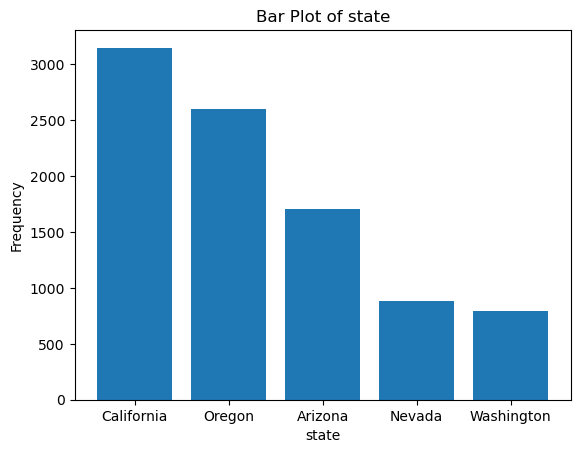

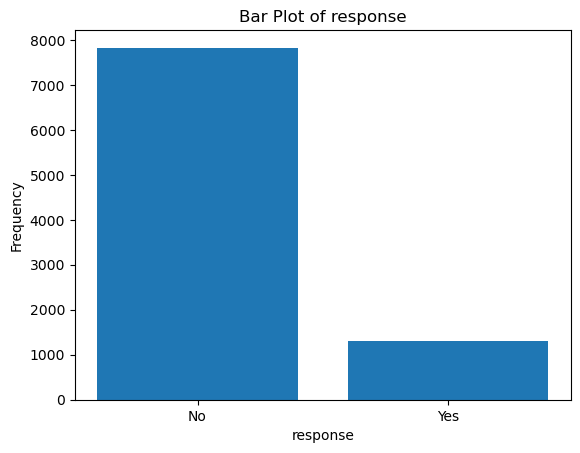

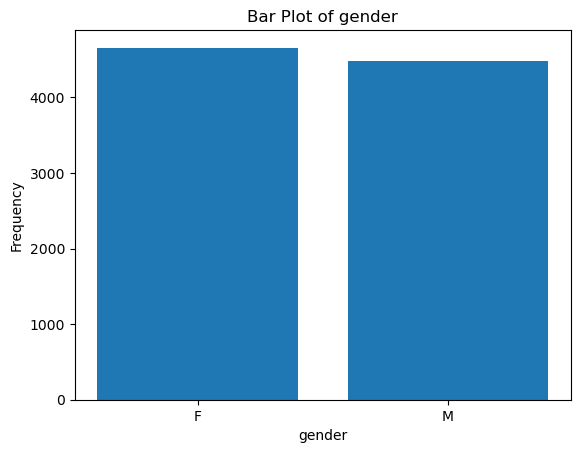

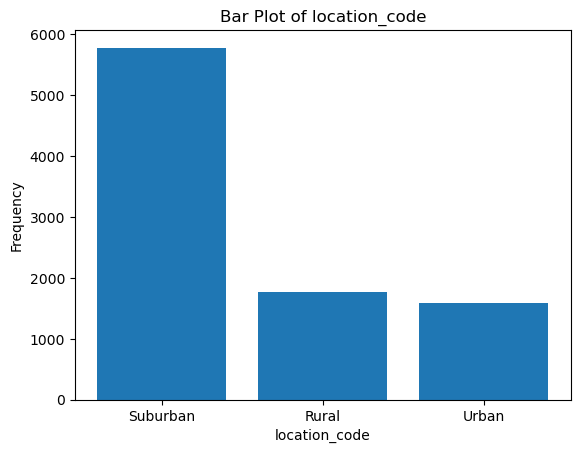

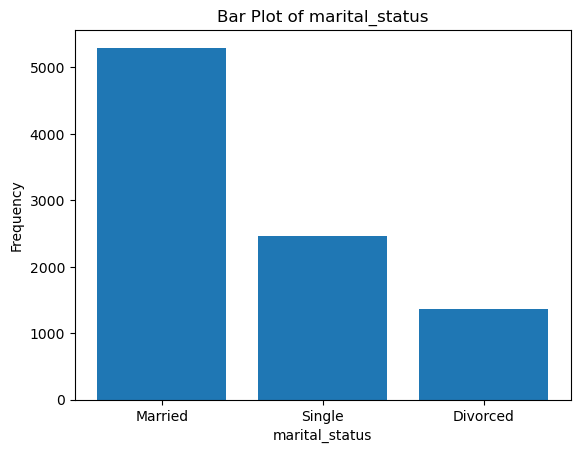

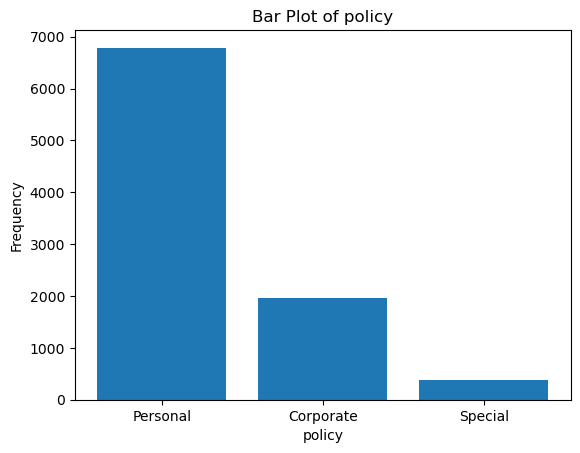

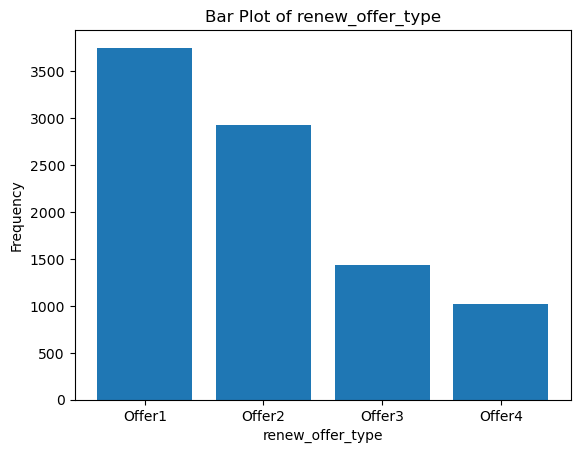

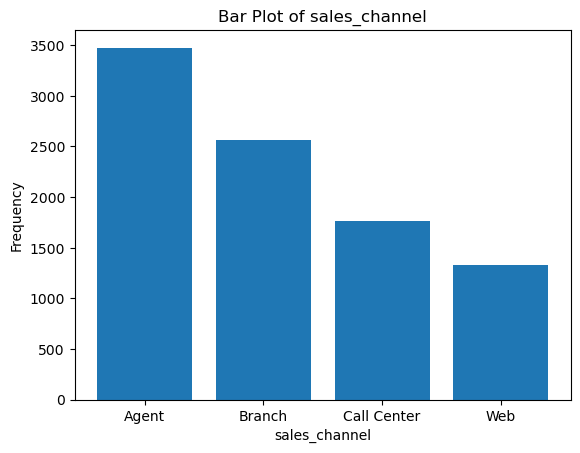

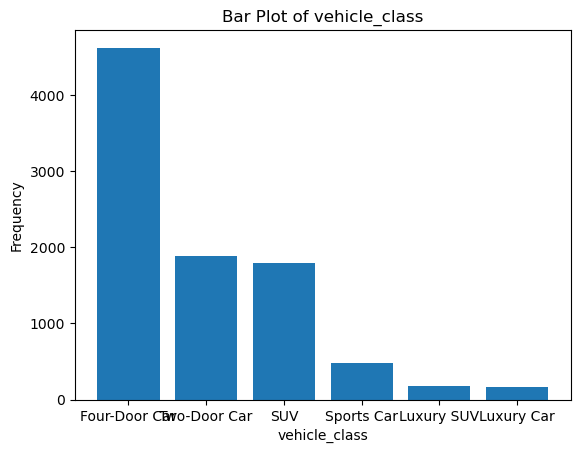

In [75]:
barplots_cat(categoricals)

In [76]:
data["year"] = data["effective_to_date"].dt.year
data["month"] = data["effective_to_date"].dt.month
data["date"] = data["effective_to_date"].dt.day

In [77]:
data

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,type,year,month,date
0,Washington,2763.519279,No,1,3,2011-02-24,1,F,56274,Suburban,...,Corporate,Offer1,Agent,384.811147,Two-Door Car,2,3,2011,2,24
1,Arizona,6979.535903,No,2,3,2011-01-31,2,F,0,Suburban,...,Personal,Offer3,Agent,1131.464935,Four-Door Car,2,3,2011,1,31
2,Nevada,12887.431650,No,3,3,2011-02-19,1,F,48767,Suburban,...,Personal,Offer1,Agent,566.472247,Two-Door Car,2,3,2011,2,19
3,California,7645.861827,No,1,3,2011-01-20,2,M,0,Suburban,...,Corporate,Offer1,Call Center,529.881344,SUV,2,2,2011,1,20
4,Washington,2813.692575,No,1,3,2011-02-03,1,M,43836,Rural,...,Personal,Offer1,Agent,138.130879,Four-Door Car,2,1,2011,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,1,3,2011-02-10,1,M,71941,Urban,...,Personal,Offer2,Web,198.234764,Four-Door Car,2,1,2011,2,10
9130,California,3096.511217,Yes,2,2,2011-02-12,1,F,21604,Suburban,...,Corporate,Offer1,Branch,379.200000,Four-Door Car,2,3,2011,2,12
9131,California,8163.890428,No,2,3,2011-02-06,2,M,0,Suburban,...,Corporate,Offer1,Branch,790.784983,Four-Door Car,2,2,2011,2,6
9132,California,7524.442436,No,2,2,2011-02-03,1,M,21941,Suburban,...,Personal,Offer3,Branch,691.200000,Four-Door Car,3,2,2011,2,3


In [78]:
data = data.drop('effective_to_date',axis = 1) ##this is now redundant

In [79]:
data.shape

(9134, 25)

In [80]:
dates = data.filter(['year','month','date'], axis=1)

In [81]:
dates

,year,month,date
0,2011,2,24
1,2011,1,31
2,2011,2,19
3,2011,1,20
4,2011,2,3
...,...,...,...
9129,2011,2,10
9130,2011,2,12
9131,2011,2,6
9132,2011,2,3


In [82]:
def barplots_dates(dates):
    for column in dates.columns:
        counts = dates[column].value_counts()
        plt.bar(counts.index, counts.values)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Bar Plot of {column}')
        plt.show()

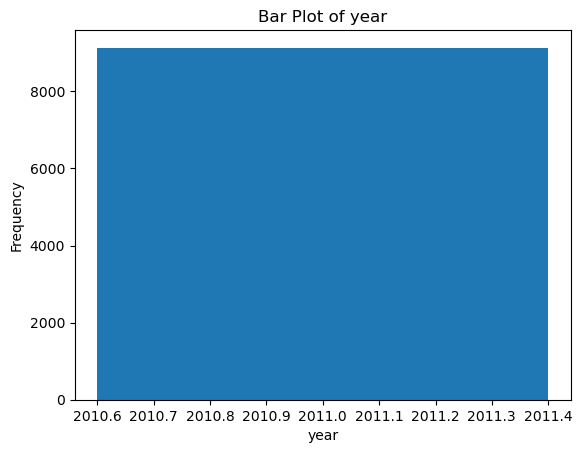

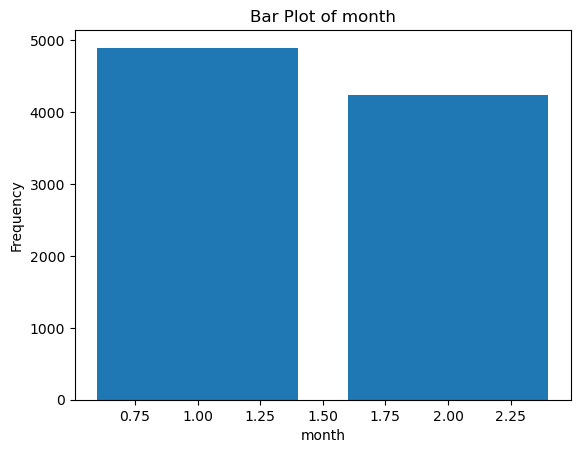

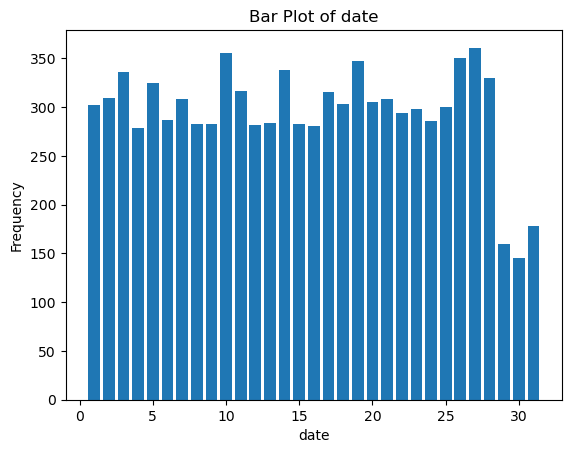

In [83]:
barplots_dates(dates)  ##we only have data from Jan and Feb of 2011

In [84]:
X = data.drop(['total_claim_amount'], axis=1)
y = data['total_claim_amount']

/var/folders/v3/dt262g6s2893mxzspk7wv1f40000gn/T/ipykernel_438/3755846664.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X.corr(), annot=True)


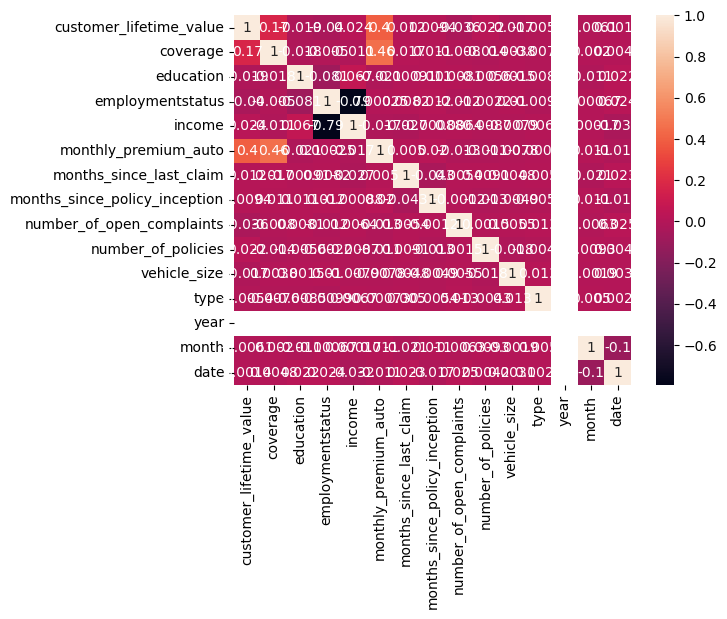

In [85]:
sns.heatmap(X.corr(), annot=True)
plt.show()  ##we see no high correlations

In [86]:
data['monthly_premium_auto'].value_counts().head(50) ##what is this? there are so many value counts. 
##We cant really bin them, or rank them, so I will drop since it is also the highest in correlation amongst the explainer. 

65     348
66     307
71     304
73     302
63     289
69     287
67     284
61     277
72     275
68     270
64     266
74     258
62     257
70     249
112    124
113    113
109    113
110    112
102    111
103    109
106    108
107    105
83     105
92     101
118     99
114     99
119     98
101     98
117     98
116     98
96      96
104     96
99      94
86      94
111     92
105     91
76      90
88      88
82      86
95      85
79      84
84      82
108     81
115     81
90      81
80      80
94      79
87      77
89      77
78      76
Name: monthly_premium_auto, dtype: int64

In [87]:
X = data.drop(['monthly_premium_auto','year'], axis=1) ##also dropped year beacuse it is all data from 2011

In [88]:
X

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,type,month,date
0,Washington,2763.519279,No,1,3,1,F,56274,Suburban,Married,...,1,Corporate,Offer1,Agent,384.811147,Two-Door Car,2,3,2,24
1,Arizona,6979.535903,No,2,3,2,F,0,Suburban,Single,...,8,Personal,Offer3,Agent,1131.464935,Four-Door Car,2,3,1,31
2,Nevada,12887.431650,No,3,3,1,F,48767,Suburban,Married,...,2,Personal,Offer1,Agent,566.472247,Two-Door Car,2,3,2,19
3,California,7645.861827,No,1,3,2,M,0,Suburban,Married,...,7,Corporate,Offer1,Call Center,529.881344,SUV,2,2,1,20
4,Washington,2813.692575,No,1,3,1,M,43836,Rural,Single,...,1,Personal,Offer1,Agent,138.130879,Four-Door Car,2,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,1,3,1,M,71941,Urban,Married,...,2,Personal,Offer2,Web,198.234764,Four-Door Car,2,1,2,10
9130,California,3096.511217,Yes,2,2,1,F,21604,Suburban,Divorced,...,1,Corporate,Offer1,Branch,379.200000,Four-Door Car,2,3,2,12
9131,California,8163.890428,No,2,3,2,M,0,Suburban,Single,...,2,Corporate,Offer1,Branch,790.784983,Four-Door Car,2,2,2,6
9132,California,7524.442436,No,2,2,1,M,21941,Suburban,Married,...,3,Personal,Offer3,Branch,691.200000,Four-Door Car,3,2,2,3


# Lab 4.05

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
X_train_cat = X_train.select_dtypes(object)
X_test_cat = X_test.select_dtypes(object)

In [92]:
X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)

In [93]:
X_train_num

,customer_lifetime_value,coverage,education,employmentstatus,income,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,vehicle_size,type,month,date
5123,4768.955924,1,3,1,51144,28,32,1,9,223.305224,2,3,1,10
7738,2827.559570,2,2,2,0,30,25,0,1,568.800000,2,2,2,18
214,2912.892035,1,2,1,81097,7,67,0,1,355.200000,1,1,2,28
8580,5138.244998,1,3,1,72264,2,66,0,9,272.649844,2,3,1,8
7857,2610.369217,1,3,1,54737,3,86,0,1,391.970334,2,3,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,7334.328083,1,2,1,87957,31,63,0,2,308.321335,1,3,1,29
5191,5498.940679,1,2,2,22520,17,64,0,3,350.400000,2,3,2,5
5390,8992.779137,2,1,2,0,13,4,0,7,1059.572464,2,1,1,27
860,14635.451580,2,3,2,0,5,56,0,2,667.200000,2,3,2,27


In [94]:
X_train_num = X_train_num.drop(['total_claim_amount'], axis=1)

In [95]:
X_test_num = X_test_num.drop(['total_claim_amount'], axis=1)

In [96]:
X_train_num

,customer_lifetime_value,coverage,education,employmentstatus,income,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,vehicle_size,type,month,date
5123,4768.955924,1,3,1,51144,28,32,1,9,2,3,1,10
7738,2827.559570,2,2,2,0,30,25,0,1,2,2,2,18
214,2912.892035,1,2,1,81097,7,67,0,1,1,1,2,28
8580,5138.244998,1,3,1,72264,2,66,0,9,2,3,1,8
7857,2610.369217,1,3,1,54737,3,86,0,1,2,3,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,7334.328083,1,2,1,87957,31,63,0,2,1,3,1,29
5191,5498.940679,1,2,2,22520,17,64,0,3,2,3,2,5
5390,8992.779137,2,1,2,0,13,4,0,7,2,1,1,27
860,14635.451580,2,3,2,0,5,56,0,2,2,3,2,27


In [97]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X_train_num)
numericals_train_std = transformer.transform(X_train_num)
numericals_test_std = transformer.transform(X_test_num)

In [98]:
pd.DataFrame(numericals_train_std).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.479124,-0.730667,0.658995,-0.776832,0.451347,1.278496,-0.570400,0.680218,2.504111,0.162577,0.889242,-0.931837,-0.637614
1,-0.764993,0.789978,-0.264710,1.287280,-1.242714,1.476446,-0.820599,-0.416990,-0.828167,0.162577,-0.423158,1.073149,0.287787
2,-0.752428,-0.730667,-0.264710,-0.776832,1.443490,-0.799983,0.680592,-0.416990,-0.828167,-1.708206,-1.735557,1.073149,1.444538
3,-0.424747,-0.730667,0.658995,-0.776832,1.150912,-1.294859,0.644850,-0.416990,2.504111,0.162577,0.889242,-0.931837,-0.868964
4,-0.796975,-0.730667,0.658995,-0.776832,0.570359,-1.195884,1.359702,-0.416990,-0.828167,0.162577,0.889242,-0.931837,0.287787


In [99]:
X_train_cat

,state,response,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class
5123,Washington,No,M,Urban,Married,Personal,Offer1,Agent,Two-Door Car
7738,Oregon,No,F,Suburban,Single,Special,Offer3,Branch,Four-Door Car
214,Arizona,No,M,Suburban,Divorced,Personal,Offer4,Agent,Four-Door Car
8580,California,No,F,Urban,Married,Corporate,Offer3,Web,Four-Door Car
7857,Washington,No,F,Suburban,Single,Personal,Offer3,Web,Four-Door Car
...,...,...,...,...,...,...,...,...,...
5734,California,No,F,Suburban,Divorced,Personal,Offer3,Agent,Four-Door Car
5191,California,Yes,M,Suburban,Married,Personal,Offer1,Branch,Four-Door Car
5390,California,No,F,Suburban,Single,Personal,Offer1,Call Center,SUV
860,Arizona,Yes,F,Suburban,Divorced,Personal,Offer1,Call Center,SUV


In [100]:
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_train_cat)
X_cat_train_encoded = encoder.transform(X_train_cat).toarray()
X_cat_test_encoded = encoder.transform(X_test_cat).toarray()

In [101]:
X_cat_train_encoded

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [102]:
X_cat_test_encoded

array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [103]:
X_train = np.concatenate((numericals_train_std,X_cat_train_encoded),axis=1)
X_test = np.concatenate((numericals_test_std,X_cat_test_encoded),axis=1)

In [104]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,-0.479124,-0.730667,0.658995,-0.776832,0.451347,1.278496,-0.570400,0.680218,2.504111,0.162577,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.764993,0.789978,-0.264710,1.287280,-1.242714,1.476446,-0.820599,-0.416990,-0.828167,0.162577,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.752428,-0.730667,-0.264710,-0.776832,1.443490,-0.799983,0.680592,-0.416990,-0.828167,-1.708206,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.424747,-0.730667,0.658995,-0.776832,1.150912,-1.294859,0.644850,-0.416990,2.504111,0.162577,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.796975,-0.730667,0.658995,-0.776832,0.570359,-1.195884,1.359702,-0.416990,-0.828167,0.162577,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,-0.101375,-0.730667,-0.264710,-0.776832,1.670716,1.575422,0.537622,-0.416990,-0.411632,-1.708206,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7303,-0.371635,-0.730667,-0.264710,1.287280,-0.496776,0.189769,0.573364,-0.416990,0.004902,0.162577,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7304,0.142830,0.789978,-1.188416,1.287280,-1.242714,-0.206132,-1.571194,-0.416990,1.671041,0.162577,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7305,0.973709,0.789978,0.658995,1.287280,-1.242714,-0.997933,0.287423,-0.416990,-0.411632,0.162577,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [105]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,-0.559570,-0.730667,-1.188416,-0.776832,1.227791,-1.393834,0.037225,-0.416990,-0.828167,0.162577,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.369367,-0.730667,-1.188416,-0.776832,-0.473656,-0.799983,-1.356738,-0.416990,0.421437,0.162577,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.620606,0.789978,-0.264710,-0.776832,1.900791,-1.195884,-0.355944,-0.416990,-0.828167,-1.708206,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.015898,0.789978,-0.264710,-0.776832,1.312852,-1.195884,-0.749113,0.680218,0.837972,0.162577,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.013410,-0.730667,-1.188416,1.287280,-0.455405,0.288744,-1.213768,-0.416990,-0.411632,0.162577,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,0.098063,-0.730667,-0.264710,-0.776832,0.714810,1.575422,0.895048,-0.416990,0.004902,0.162577,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1823,-0.058783,-0.730667,-1.188416,-0.776832,1.072608,0.783620,0.716335,-0.416990,-0.411632,2.033359,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1824,-0.495109,-0.730667,0.658995,-0.776832,1.732889,0.882595,-1.320996,-0.416990,-0.828167,0.162577,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1825,-0.873696,-0.730667,-1.188416,1.287280,-1.242714,1.476446,-1.499709,0.680218,-0.828167,-1.708206,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [107]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.7557289076678618

In [108]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.7407798508481396

In [109]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=6)
KNN.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [110]:
score = KNN.score(X_test, y_test)
score

0.4290202840301798

In [111]:
score_train = KNN.score(X_train, y_train)
score_train

0.5741181465058747

# Lab 4.06

In [112]:
data

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,type,year,month,date
0,Washington,2763.519279,No,1,3,1,F,56274,Suburban,Married,...,Corporate,Offer1,Agent,384.811147,Two-Door Car,2,3,2011,2,24
1,Arizona,6979.535903,No,2,3,2,F,0,Suburban,Single,...,Personal,Offer3,Agent,1131.464935,Four-Door Car,2,3,2011,1,31
2,Nevada,12887.431650,No,3,3,1,F,48767,Suburban,Married,...,Personal,Offer1,Agent,566.472247,Two-Door Car,2,3,2011,2,19
3,California,7645.861827,No,1,3,2,M,0,Suburban,Married,...,Corporate,Offer1,Call Center,529.881344,SUV,2,2,2011,1,20
4,Washington,2813.692575,No,1,3,1,M,43836,Rural,Single,...,Personal,Offer1,Agent,138.130879,Four-Door Car,2,1,2011,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,1,3,1,M,71941,Urban,Married,...,Personal,Offer2,Web,198.234764,Four-Door Car,2,1,2011,2,10
9130,California,3096.511217,Yes,2,2,1,F,21604,Suburban,Divorced,...,Corporate,Offer1,Branch,379.200000,Four-Door Car,2,3,2011,2,12
9131,California,8163.890428,No,2,3,2,M,0,Suburban,Single,...,Corporate,Offer1,Branch,790.784983,Four-Door Car,2,2,2011,2,6
9132,California,7524.442436,No,2,2,1,M,21941,Suburban,Married,...,Personal,Offer3,Branch,691.200000,Four-Door Car,3,2,2011,2,3


In [113]:
numericals = data.select_dtypes(np.number)
numericals

,customer_lifetime_value,coverage,education,employmentstatus,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,vehicle_size,type,year,month,date
0,2763.519279,1,3,1,56274,69,32,5,0,1,384.811147,2,3,2011,2,24
1,6979.535903,2,3,2,0,94,13,42,0,8,1131.464935,2,3,2011,1,31
2,12887.431650,3,3,1,48767,108,18,38,0,2,566.472247,2,3,2011,2,19
3,7645.861827,1,3,2,0,106,18,65,0,7,529.881344,2,2,2011,1,20
4,2813.692575,1,3,1,43836,73,12,44,0,1,138.130879,2,1,2011,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,1,3,1,71941,73,18,89,0,2,198.234764,2,1,2011,2,10
9130,3096.511217,2,2,1,21604,79,14,28,0,1,379.200000,2,3,2011,2,12
9131,8163.890428,2,3,2,0,85,9,37,3,2,790.784983,2,2,2011,2,6
9132,7524.442436,2,2,1,21941,96,34,3,0,3,691.200000,3,2,2011,2,3


In [114]:
numericals['customer_lifetime_value_log'] = np.log2(numericals['customer_lifetime_value']).round() ##log of clv rounded

In [115]:
numericals

,customer_lifetime_value,coverage,education,employmentstatus,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,vehicle_size,type,year,month,date,customer_lifetime_value_log
0,2763.519279,1,3,1,56274,69,32,5,0,1,384.811147,2,3,2011,2,24,11.0
1,6979.535903,2,3,2,0,94,13,42,0,8,1131.464935,2,3,2011,1,31,13.0
2,12887.431650,3,3,1,48767,108,18,38,0,2,566.472247,2,3,2011,2,19,14.0
3,7645.861827,1,3,2,0,106,18,65,0,7,529.881344,2,2,2011,1,20,13.0
4,2813.692575,1,3,1,43836,73,12,44,0,1,138.130879,2,1,2011,2,3,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,1,3,1,71941,73,18,89,0,2,198.234764,2,1,2011,2,10,15.0
9130,3096.511217,2,2,1,21604,79,14,28,0,1,379.200000,2,3,2011,2,12,12.0
9131,8163.890428,2,3,2,0,85,9,37,3,2,790.784983,2,2,2011,2,6,13.0
9132,7524.442436,2,2,1,21941,96,34,3,0,3,691.200000,3,2,2011,2,3,13.0


In [116]:
data['customer_lifetime_value_log'] = np.log2(data['customer_lifetime_value']).round() ##also in data just incase

In [117]:
data

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,type,year,month,date,customer_lifetime_value_log
0,Washington,2763.519279,No,1,3,1,F,56274,Suburban,Married,...,Offer1,Agent,384.811147,Two-Door Car,2,3,2011,2,24,11.0
1,Arizona,6979.535903,No,2,3,2,F,0,Suburban,Single,...,Offer3,Agent,1131.464935,Four-Door Car,2,3,2011,1,31,13.0
2,Nevada,12887.431650,No,3,3,1,F,48767,Suburban,Married,...,Offer1,Agent,566.472247,Two-Door Car,2,3,2011,2,19,14.0
3,California,7645.861827,No,1,3,2,M,0,Suburban,Married,...,Offer1,Call Center,529.881344,SUV,2,2,2011,1,20,13.0
4,Washington,2813.692575,No,1,3,1,M,43836,Rural,Single,...,Offer1,Agent,138.130879,Four-Door Car,2,1,2011,2,3,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,1,3,1,M,71941,Urban,Married,...,Offer2,Web,198.234764,Four-Door Car,2,1,2011,2,10,15.0
9130,California,3096.511217,Yes,2,2,1,F,21604,Suburban,Divorced,...,Offer1,Branch,379.200000,Four-Door Car,2,3,2011,2,12,12.0
9131,California,8163.890428,No,2,3,2,M,0,Suburban,Single,...,Offer1,Branch,790.784983,Four-Door Car,2,2,2011,2,6,13.0
9132,California,7524.442436,No,2,2,1,M,21941,Suburban,Married,...,Offer3,Branch,691.200000,Four-Door Car,3,2,2011,2,3,13.0


In [118]:
numericals

,customer_lifetime_value,coverage,education,employmentstatus,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,vehicle_size,type,year,month,date,customer_lifetime_value_log
0,2763.519279,1,3,1,56274,69,32,5,0,1,384.811147,2,3,2011,2,24,11.0
1,6979.535903,2,3,2,0,94,13,42,0,8,1131.464935,2,3,2011,1,31,13.0
2,12887.431650,3,3,1,48767,108,18,38,0,2,566.472247,2,3,2011,2,19,14.0
3,7645.861827,1,3,2,0,106,18,65,0,7,529.881344,2,2,2011,1,20,13.0
4,2813.692575,1,3,1,43836,73,12,44,0,1,138.130879,2,1,2011,2,3,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,1,3,1,71941,73,18,89,0,2,198.234764,2,1,2011,2,10,15.0
9130,3096.511217,2,2,1,21604,79,14,28,0,1,379.200000,2,3,2011,2,12,12.0
9131,8163.890428,2,3,2,0,85,9,37,3,2,790.784983,2,2,2011,2,6,13.0
9132,7524.442436,2,2,1,21941,96,34,3,0,3,691.200000,3,2,2011,2,3,13.0


In [119]:
data['income'].describe().T ##very large scale & std, so lets bin

count     9134.000000
mean     37657.380009
std      30379.904734
min          0.000000
25%          0.000000
50%      33889.500000
75%      62320.000000
max      99981.000000
Name: income, dtype: float64

In [120]:
data = data.drop(['customer_lifetime_value','year','date','month'], axis=1)

In [121]:
numericals = numericals.drop(['customer_lifetime_value','year','date','month'], axis=1)

In [122]:
income_labels = [1,2,3,4,5]
data['income']= pd.cut(data['income'],5,labels=income_labels)
data ##binned the customer_lifetime_value also in original data

,state,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,...,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,type,customer_lifetime_value_log
0,Washington,No,1,3,1,F,3,Suburban,Married,69,...,0,1,Corporate,Offer1,Agent,384.811147,Two-Door Car,2,3,11.0
1,Arizona,No,2,3,2,F,1,Suburban,Single,94,...,0,8,Personal,Offer3,Agent,1131.464935,Four-Door Car,2,3,13.0
2,Nevada,No,3,3,1,F,3,Suburban,Married,108,...,0,2,Personal,Offer1,Agent,566.472247,Two-Door Car,2,3,14.0
3,California,No,1,3,2,M,1,Suburban,Married,106,...,0,7,Corporate,Offer1,Call Center,529.881344,SUV,2,2,13.0
4,Washington,No,1,3,1,M,3,Rural,Single,73,...,0,1,Personal,Offer1,Agent,138.130879,Four-Door Car,2,1,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,1,3,1,M,4,Urban,Married,73,...,0,2,Personal,Offer2,Web,198.234764,Four-Door Car,2,1,15.0
9130,California,Yes,2,2,1,F,2,Suburban,Divorced,79,...,0,1,Corporate,Offer1,Branch,379.200000,Four-Door Car,2,3,12.0
9131,California,No,2,3,2,M,1,Suburban,Single,85,...,3,2,Corporate,Offer1,Branch,790.784983,Four-Door Car,2,2,13.0
9132,California,No,2,2,1,M,2,Suburban,Married,96,...,0,3,Personal,Offer3,Branch,691.200000,Four-Door Car,3,2,13.0


In [123]:
income_labels2 = [1,2,3,4,5]
numericals['income']= pd.cut(numericals['income'],5,labels=income_labels)
numericals ##binned the customer_lifetime_value also in numericals

,coverage,education,employmentstatus,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,vehicle_size,type,customer_lifetime_value_log
0,1,3,1,3,69,32,5,0,1,384.811147,2,3,11.0
1,2,3,2,1,94,13,42,0,8,1131.464935,2,3,13.0
2,3,3,1,3,108,18,38,0,2,566.472247,2,3,14.0
3,1,3,2,1,106,18,65,0,7,529.881344,2,2,13.0
4,1,3,1,3,73,12,44,0,1,138.130879,2,1,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,3,1,4,73,18,89,0,2,198.234764,2,1,15.0
9130,2,2,1,2,79,14,28,0,1,379.200000,2,3,12.0
9131,2,3,2,1,85,9,37,3,2,790.784983,2,2,13.0
9132,2,2,1,2,96,34,3,0,3,691.200000,3,2,13.0


In [124]:
data['income'].value_counts()

1    2839
2    2274
3    1540
4    1457
5    1024
Name: income, dtype: int64

In [125]:
def hist_num(numericals):
    for column in numericals.columns:
        plt.hist(numericals[column],bins=20) 
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {column}')
        plt.show()

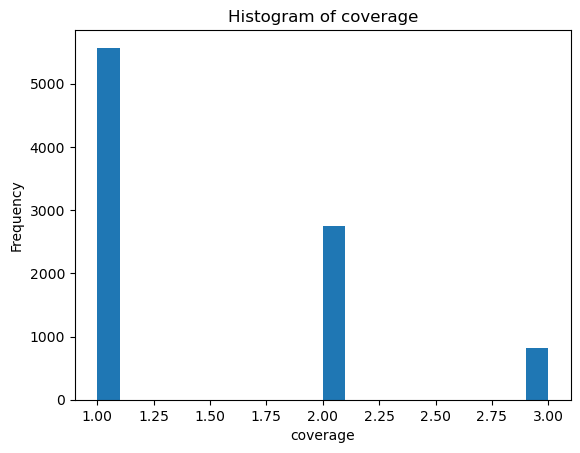

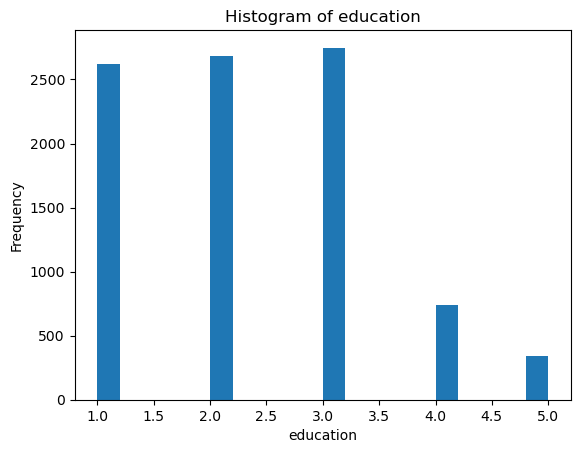

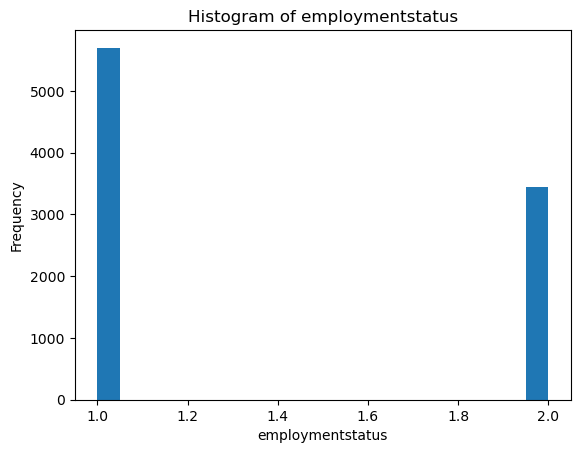

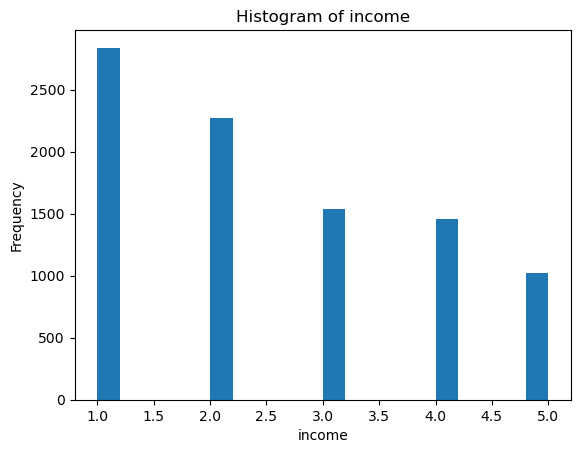

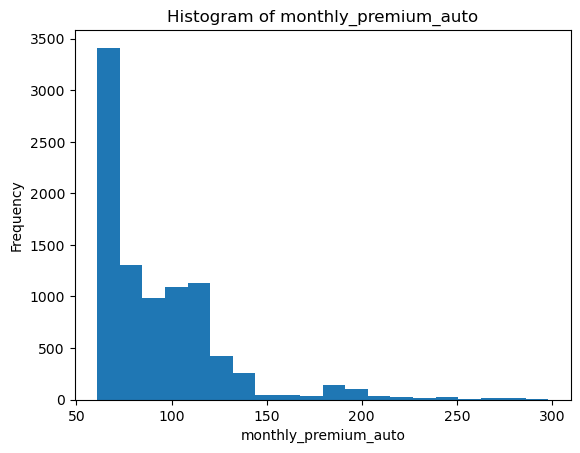

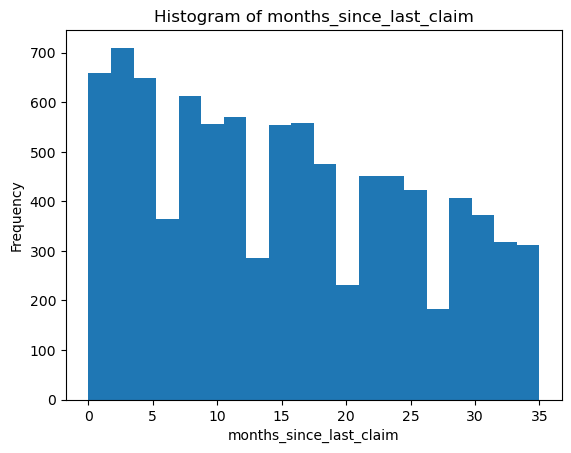

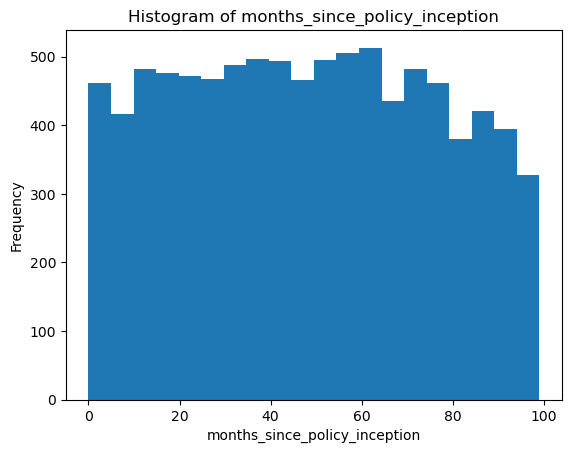

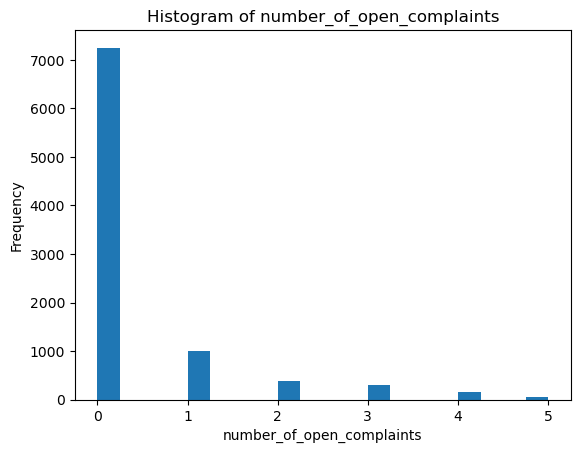

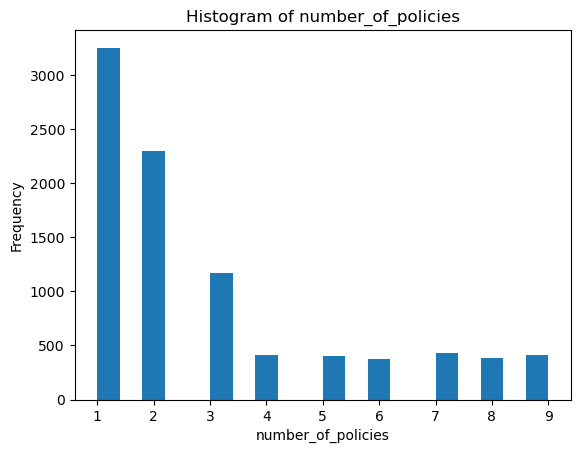

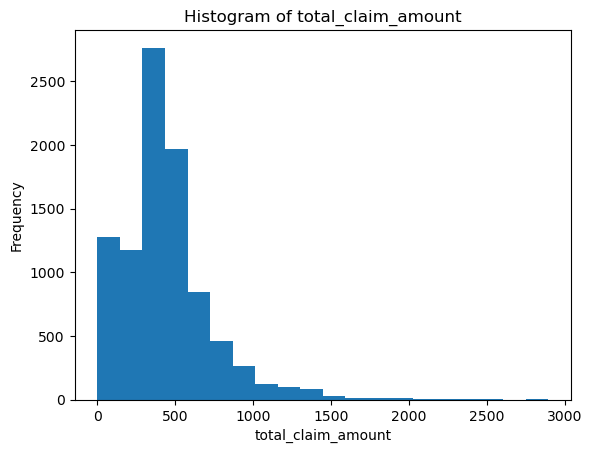

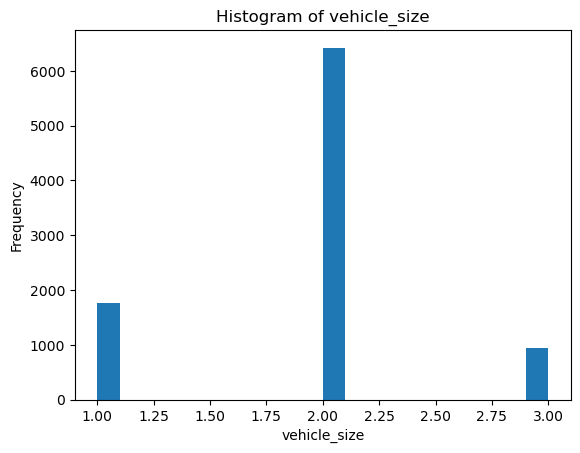

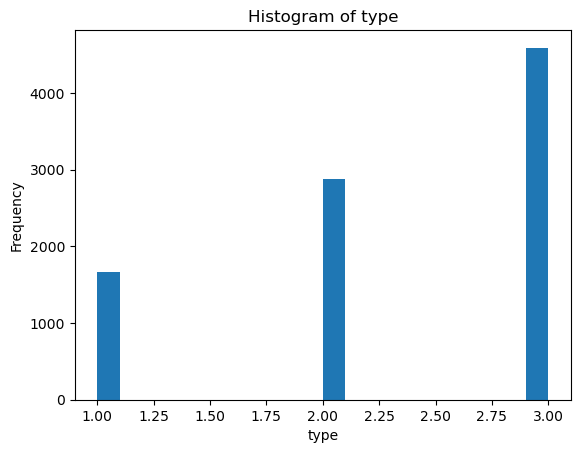

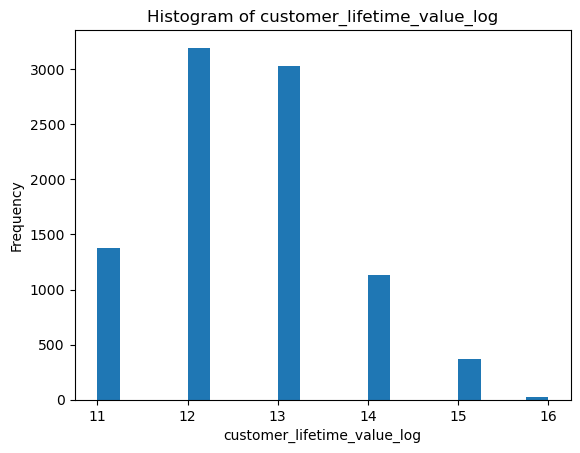

In [126]:
hist_num(numericals) ##clv is now normally distributed

In [127]:
data

,state,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,...,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,type,customer_lifetime_value_log
0,Washington,No,1,3,1,F,3,Suburban,Married,69,...,0,1,Corporate,Offer1,Agent,384.811147,Two-Door Car,2,3,11.0
1,Arizona,No,2,3,2,F,1,Suburban,Single,94,...,0,8,Personal,Offer3,Agent,1131.464935,Four-Door Car,2,3,13.0
2,Nevada,No,3,3,1,F,3,Suburban,Married,108,...,0,2,Personal,Offer1,Agent,566.472247,Two-Door Car,2,3,14.0
3,California,No,1,3,2,M,1,Suburban,Married,106,...,0,7,Corporate,Offer1,Call Center,529.881344,SUV,2,2,13.0
4,Washington,No,1,3,1,M,3,Rural,Single,73,...,0,1,Personal,Offer1,Agent,138.130879,Four-Door Car,2,1,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,1,3,1,M,4,Urban,Married,73,...,0,2,Personal,Offer2,Web,198.234764,Four-Door Car,2,1,15.0
9130,California,Yes,2,2,1,F,2,Suburban,Divorced,79,...,0,1,Corporate,Offer1,Branch,379.200000,Four-Door Car,2,3,12.0
9131,California,No,2,3,2,M,1,Suburban,Single,85,...,3,2,Corporate,Offer1,Branch,790.784983,Four-Door Car,2,2,13.0
9132,California,No,2,2,1,M,2,Suburban,Married,96,...,0,3,Personal,Offer3,Branch,691.200000,Four-Door Car,3,2,13.0
